In [3]:
# Importing certain libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Zomato_Data.csv") # Reading the Zomato dataset.
print(df.head()) # This will print the dataframe.

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
def handleRate(value):
    '''
    Data cleaning is done by this function. This function removes the denominator character from the rate column and returns only the numerator character as a float value.
    '''
    value = str(value).split("/")
    value = value[0]
    return float(value)

df["rate"] = df["rate"].apply(handleRate)
print(df.head()) # This will print the cleaned data.

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
df.info() # This will print the information or summary about the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
print(df.isnull().sum()) # This will check for null values in the dataframe.

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


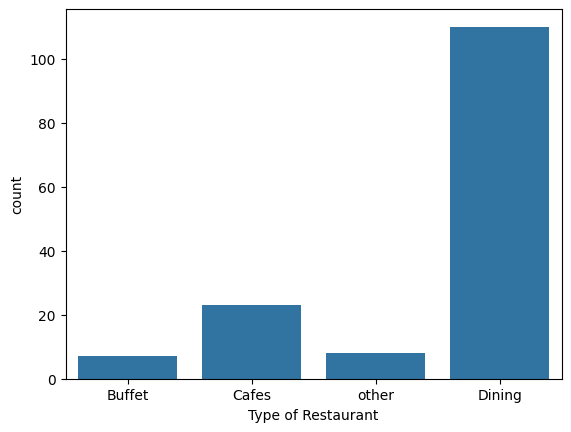

In [8]:
# This will plot the graph of types of restaurants in the dataframe.
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of Restaurant")
plt.show()

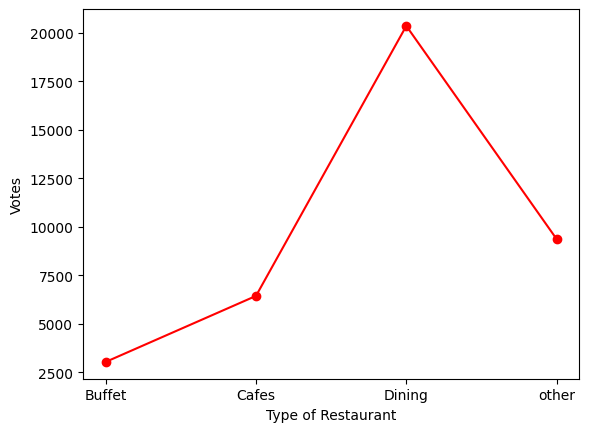

In [9]:
# This will plot the graph of votes with respect to the restaurant type.
grouped_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("Type of Restaurant")
plt.ylabel("Votes")
plt.show()

In [10]:
# This will print the restaurant with maximum votes.
max_votes = df["votes"].max()
restaurant_with_max_votes = df.loc[df["votes"] == max_votes, "name"]
print("Restaurant(s) with maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


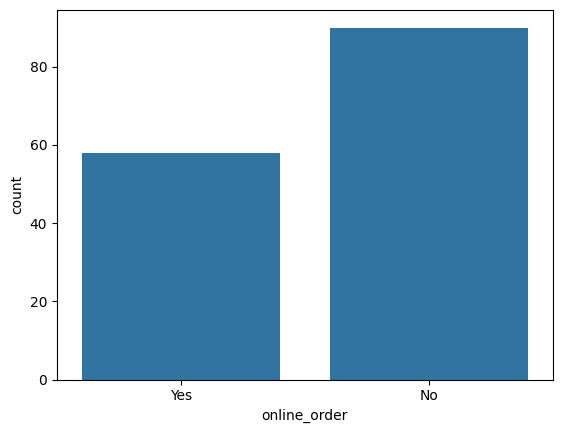

In [11]:
# This will print the online order availability of restaurants
sns.countplot(x=df["online_order"])
plt.show()

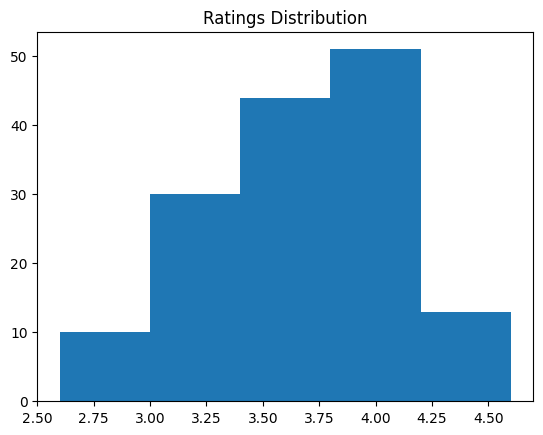

In [12]:
# This will plot the histogram for ratings of the restaurants.
plt.hist(df["rate"], bins=5)
plt.title("Ratings Distribution")
plt.show()

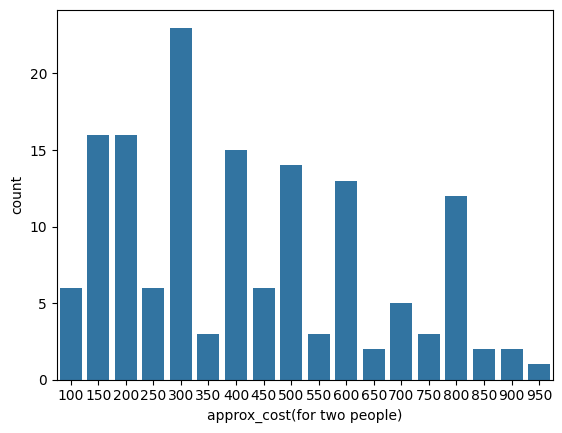

In [13]:
# This will plot the approximate cost for couples.
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)
plt.show()

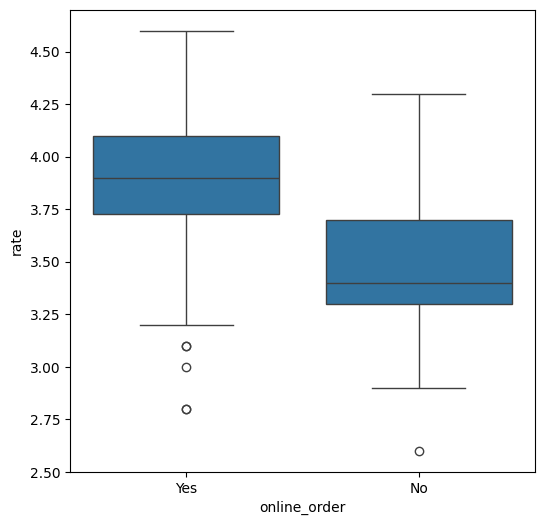

In [14]:
# This will plot the ratings comparison between online and offline orders.
plt.figure(figsize=(6, 6))
sns.boxplot(x="online_order", y="rate", data=df)
plt.show()

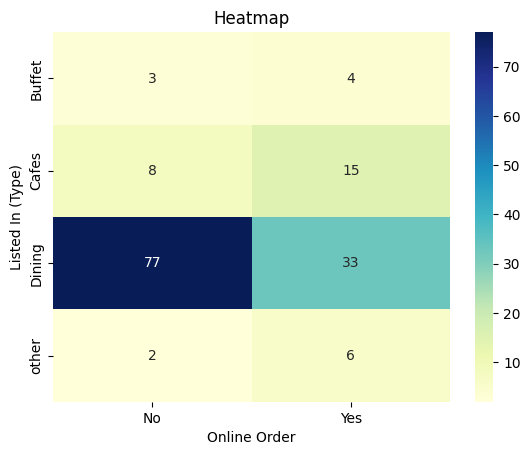

In [15]:
# This will plot the heatmap of the relationship between order mode (online_order) and restaurant type (listed_in(type)).
pivot_table = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()